# Jamboree Education - Linear Regression
- **Introduction:**
Jamboree is a platform that helps students to make it to top colleges abroad. They help students optimize their efforts to score GMAT, GRE or SAT using their unique problem-solving methods
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.
- **Objective**:
 Understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,mean_absolute_percentage_error

In [ ]:
# import data
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv" # data address
data = pd.read_csv(url,index_col=0) # used serial number as index column

In [ ]:
# column names
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# removing space in column names
renamed_cols = {'LOR ':'LOR', 'Chance of Admit ': 'Chance of Admit'}
data.rename(columns = renamed_cols, inplace = True)

In [ ]:
data.head() # inspecting data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# number of rows and columns in data
print('The data contains {} rows and {} columns'.format(data.shape[0],data.shape[1]))

The data contains 500 rows and 8 columns


In [ ]:
# data types of different variables and info about null values
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


In [ ]:
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

### Understanding the variable types
- The variables GRE score, TOFEL Score, CGPA, Chance of Admit are Continious numerical variables
-  University Rating, SOP, LOR are Ordinal variables
- Research is a boolean variable having values 1 or 0

In [ ]:
# categorical / ordinal variale list
numerical_variables = ['GRE Score','TOEFL Score','CGPA','Chance of Admit']
categorical_variables = ['University Rating','SOP','LOR','Research']

In [ ]:
# changing the data type of Research to bool and University Rating as ordinal variable
data[categorical_variables] = data[categorical_variables].astype('object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    object 
 3   SOP                500 non-null    object 
 4   LOR                500 non-null    object 
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    object 
 7   Chance of Admit    500 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 35.2+ KB


In [ ]:
# checking for duplicates
data.duplicated().sum()


0

- There are no duplicate rows in the data

In [ ]:
# checking for null or missing values
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- There are no missing data values


## Splitting the data for testing and training purpose
- Since we should avoid any kind of bias, we  split the data into test and train sets before performing EDA

In [ ]:
def test_train_split(data,ratio=0.8):
  n = len(data)
  x = np.arange(n)
  rng = np.random.default_rng()
  rng.shuffle(x)
  test_data = data.iloc[x[:int(n*ratio)]]
  train_data = data.iloc[x[int(n*ratio):]]
  return train_data,test_data



In [ ]:
# dividing data into test and train data
test_data, train_data = test_train_split(data,ratio = 0.8)

In [ ]:
test_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
14,307,109,3,4.0,3.0,8.00,1,0.62
389,296,97,2,1.5,2.0,7.80,0,0.49
354,300,102,3,3.5,2.5,8.17,0,0.63
442,332,112,1,1.5,3.0,8.66,1,0.79
396,324,110,3,3.5,3.5,9.04,1,0.82


### Univariate analysis

### Categorical Variables


In [ ]:
# statistical summery of train_data
train_data.describe(include = ["object"]).T

,count,unique,top,freq
University Rating,400.0,5.0,3.0,124.0
SOP,400.0,9.0,4.0,73.0
LOR,400.0,9.0,4.0,77.0
Research,400.0,2.0,1.0,229.0


In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,400.0,316.712500,11.364538,290.00,309.0000,317.000,325.0000,340.00
TOEFL Score,400.0,107.282500,6.163820,92.00,103.0000,107.000,112.0000,120.00
CGPA,400.0,8.587275,0.604941,6.80,8.1375,8.585,9.0450,9.92
Chance of Admit,400.0,0.724450,0.139850,0.34,0.6400,0.730,0.8225,0.97


In [ ]:
len(categorical_variables)

4

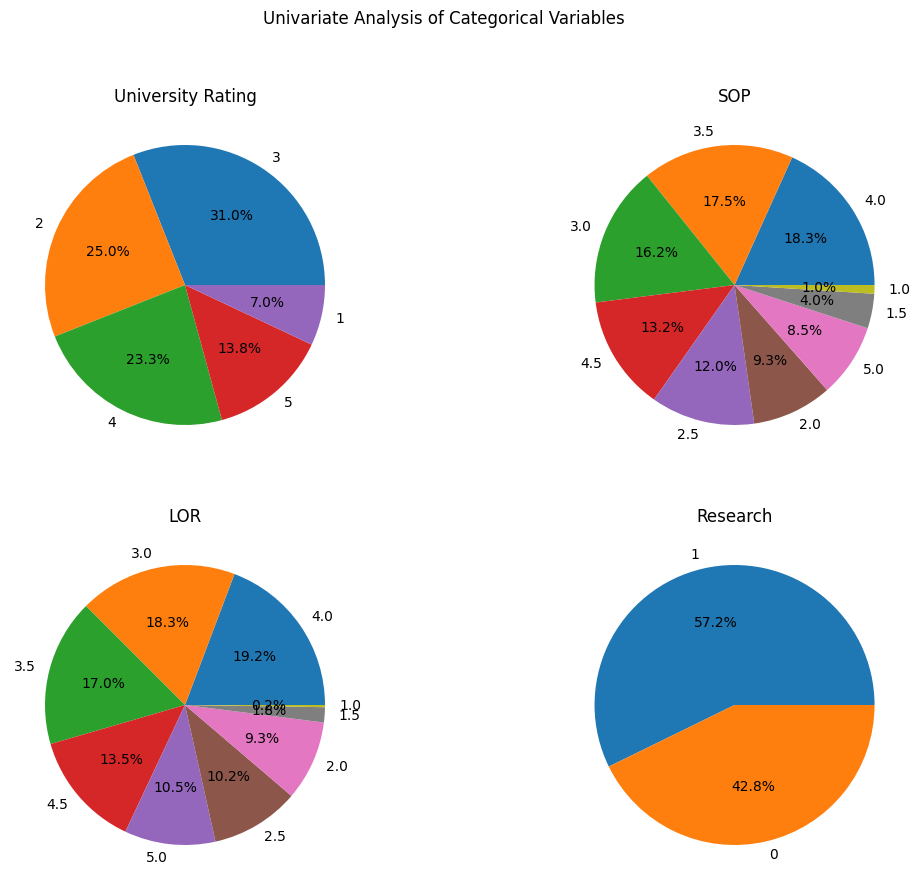

In [ ]:
nrow = 2; ncol = 2;
fig, axs = plt.subplots(nrows=nrow, ncols=nrow,figsize= (13,10))
fig.suptitle('Univariate Analysis of Categorical Variables')
ax = axs.reshape(-1)
for i,col in enumerate(categorical_variables):
  ax[i].pie(train_data[col].value_counts(),labels=train_data[col].value_counts().index, autopct='%1.1f%%')
  ax[i].set_title(col)

#### Inference from Categorical Variables

- Among students who have done research vs those who did not, 57.2 % said yes and 42.8 % said no
- Among other Categorical variables data is not uniformly distributed among all values.



## Numerical Variables

In [ ]:
print(numerical_variables)
print(len(numerical_variables))

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
4


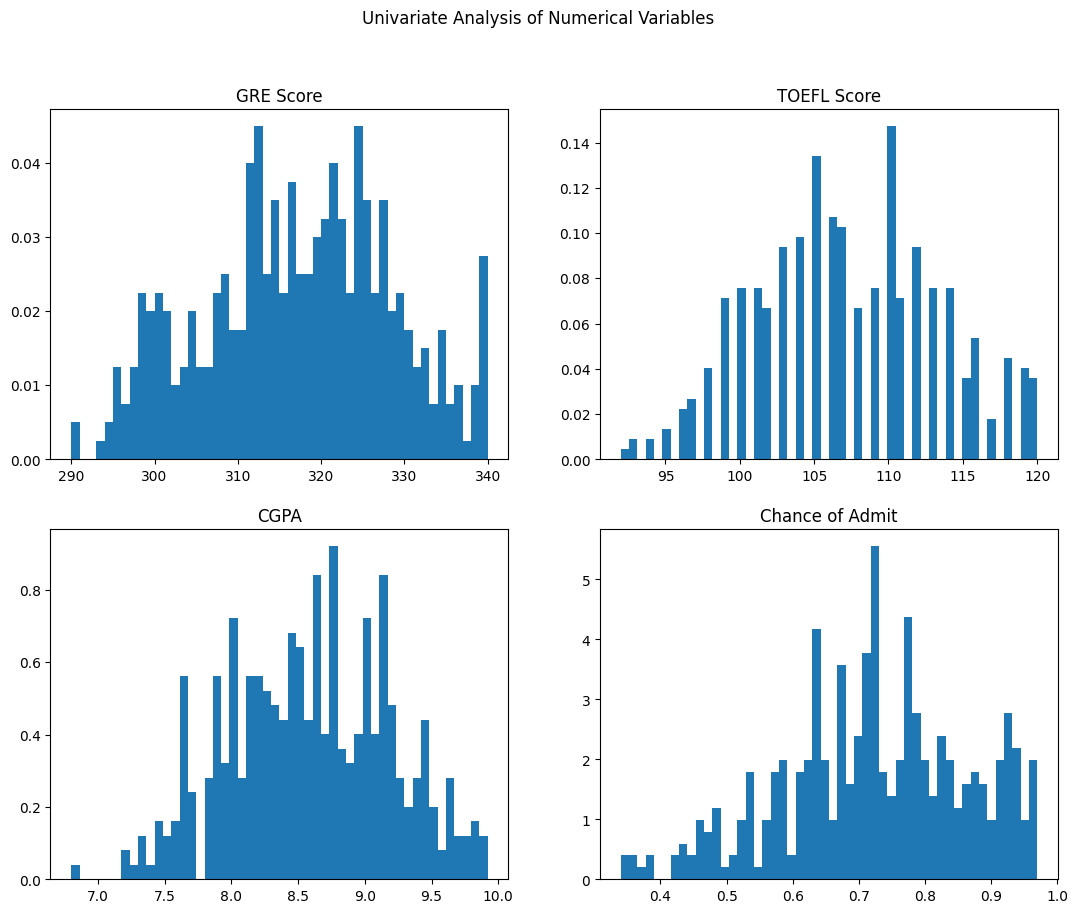

In [ ]:
nrow = 2; ncol = 2;
fig, axs = plt.subplots(nrows=nrow, ncols=nrow,figsize= (13,10))
fig.suptitle('Univariate Analysis of Numerical Variables')
ax = axs.reshape(-1)
for i,col in enumerate(numerical_variables):
  ax[i].hist(train_data[col],bins = 50,density = True,stacked = True)
  ax[i].set_title(col)

#### Inference
- Skewness of the data is small
- data is roughly bell shaped

## Outlier detection
We have used IQR (Interquartile range method) method to detect outliers

1. Sort your data from low to high
2. Identify the first quartile (Q1), the median, and the third quartile (Q3).
3. Calculate your IQR = Q3 – Q1
4. Calculate your upper fence = Q3 + (1.5 * IQR)
5. Calculate your lower fence = Q1 – (1.5 * IQR)

outliers are any values greater than your upper fence or less than your lower fence.

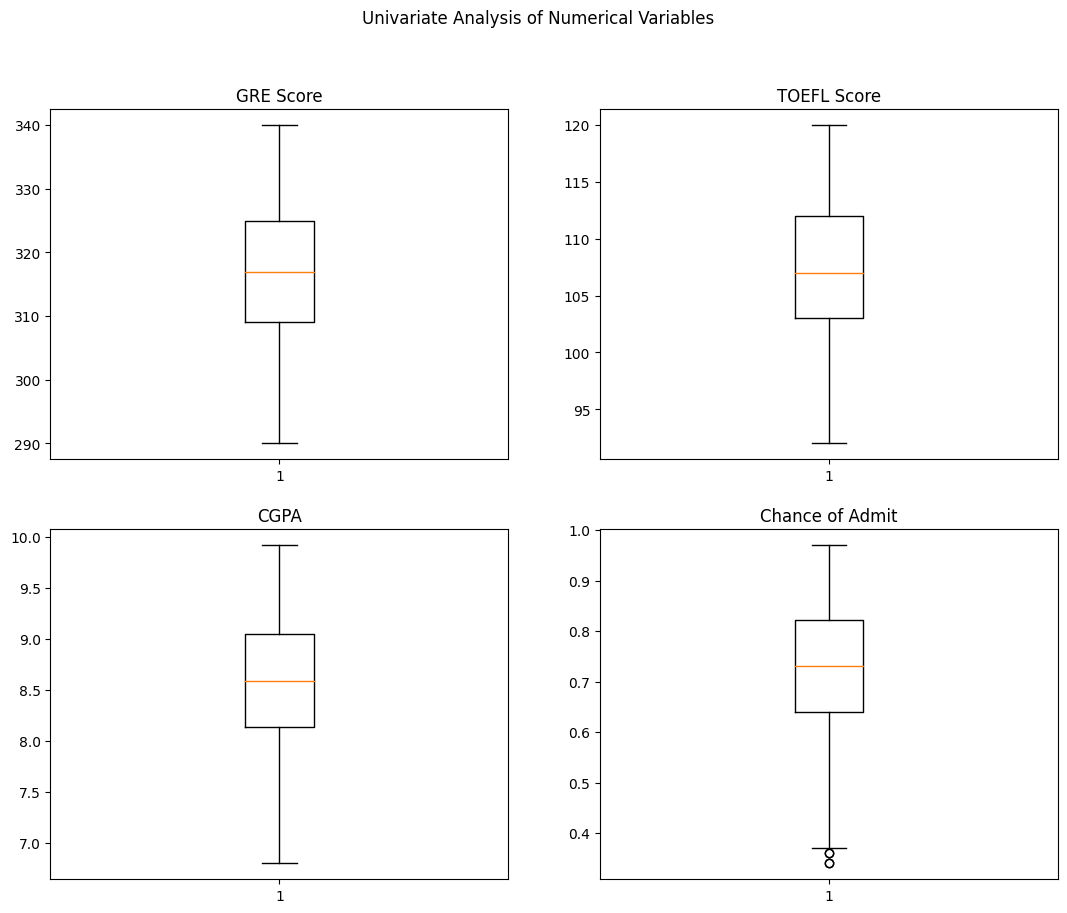

In [ ]:
nrow = 2; ncol = 2;
fig, axs = plt.subplots(nrows=nrow, ncols=nrow,figsize= (13,10))
fig.suptitle('Univariate Analysis of Numerical Variables')
ax = axs.reshape(-1)
for i,col in enumerate(numerical_variables):
  ax[i].boxplot(train_data[col])
  ax[i].set_title(col)

In [ ]:
def isoutlier(data,variable):
    q1 = np.percentile(data[variable],25)
    q3 = np.percentile(data[variable],75)
    iqr = q3-q1
    uf = q3 + (1.5*iqr)
    lf = q1 - (1.5*iqr)
    return np.where(((data[variable]<lf) | (data[variable]> uf)))

In [ ]:
train_data.iloc[isoutlier(train_data,'Chance of Admit')]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
59,300,99,1,3.0,2.0,6.80,1,0.36
377,297,96,2,2.5,2.0,7.43,0,0.34
93,298,98,2,4.0,3.0,8.03,0,0.34
95,303,99,3,2.0,2.5,7.66,0,0.36


#### Inference
- Since negligible amounts of outliers are found we didn't delete this because it will help in generalizing the model

### Correlation Analysis

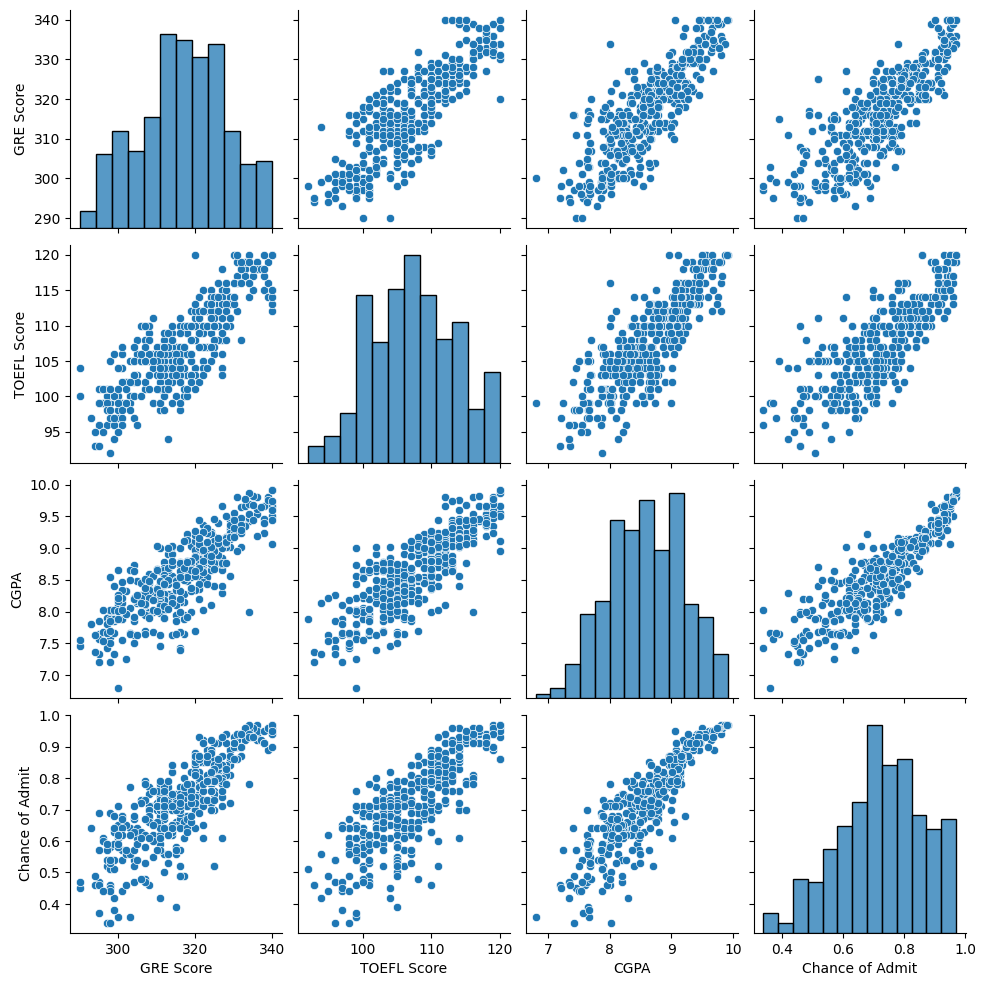

In [ ]:
sns.pairplot(train_data[numerical_variables])

<ipython-input-27-0c2cf90a270d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot = True)


<Axes: >

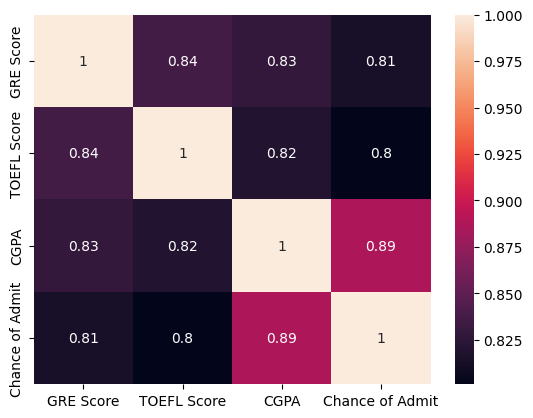

In [ ]:
sns.heatmap(train_data.corr(),annot = True)

## Inference:
As seen from the pairplots and correlation coefficients the independent variables GRE Score, TOEFL Score, CGPA are highly correlated(>0.8). We can further calculate VIF scores to  establish the strength of correlation between the variables


### Encoding Categorical variables

- Since non numeric data is ordered we use Ordinal encoding
- In this case we simply have to convert object types to numerical variable types


In [ ]:
train_data[categorical_variables] = train_data[categorical_variables].astype('float32')

<ipython-input-28-f949174dd4a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[categorical_variables] = train_data[categorical_variables].astype('float32')


In [ ]:
train_data['LOR'].value_counts()

4.0    77
3.0    73
3.5    68
4.5    54
5.0    42
2.5    41
2.0    37
1.5     7
1.0     1
Name: LOR, dtype: int64

<Axes: >

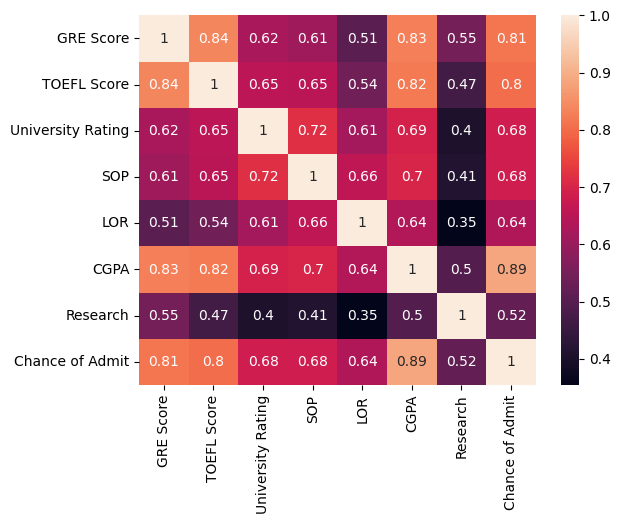

In [ ]:
sns.heatmap(train_data.corr(),annot=True)

#### Inference
- There is positive correlation between all the dependent variables and the independent variable

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# selecting training data X_train
calc_vif(train_data)

,variables,VIF
0,GRE Score,1524.949972
1,TOEFL Score,1296.434479
2,University Rating,21.241288
3,SOP,36.024412
4,LOR,31.966190
5,CGPA,1257.911680
6,Research,3.194781
7,Chance of Admit,116.984835


- The VIF values of GRE score, TOEFL Score, CGPA are very high, we can keep any one of the column. Since TOEFL score has the least VIF score among the related variables we keep this as the independent variable. This helps in avoiding multicoliniarity among independent variables

In [ ]:
independent_variables = ['TOEFL Score','University Rating', 'SOP', 'LOR', 'Research','Chance of Admit']

### Standerdizing the data

In [ ]:
scalr = StandardScaler()
train_data_std = pd.DataFrame()
test_data_std = pd.DataFrame()
train_data_std[independent_variables] = scalr.fit_transform(train_data[independent_variables])
test_data_std[independent_variables] = scalr.fit_transform(test_data[independent_variables])

In [ ]:
train_data_std

,TOEFL Score,University Rating,SOP,LOR,Research,Chance of Admit
0,0.766312,-0.103106,0.096093,-0.555008,0.864132,0.827276
1,0.278991,-0.103106,0.096093,-0.555008,0.864132,0.397708
2,-0.695650,-0.980605,-0.928896,-0.016165,-1.157230,-0.962589
3,-1.507851,-1.858104,-1.953884,-1.632694,-1.157230,-1.678536
4,-0.208330,-0.980605,-0.928896,-1.093851,-1.157230,-0.747806
...,...,...,...,...,...,...
395,-0.208330,-0.980605,-1.441390,-1.093851,-1.157230,-0.819400
396,0.928752,-0.980605,-1.441390,-1.093851,0.864132,0.612492
397,-0.045889,0.774393,0.608587,1.061520,0.864132,0.254519
398,1.253633,1.651892,1.633575,1.061520,0.864132,1.614816


## Linear Regression model

In [ ]:
X_train = train_data_std[['TOEFL Score','University Rating', 'SOP', 'LOR', 'Research']]
y_train = train_data_std['Chance of Admit']
X_train = sm.add_constant(X_train) # adding bias parameter
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 19 Sep 2023   Prob (F-statistic):          1.92e-110
Time:                        17:14:38   Log-Likelihood:                -303.80
No. Observations:                 400   AIC:                             619.6
Df Residuals:                     394   BIC:                             643.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.359e-16      0.02

In [ ]:
results.params

const               -2.359224e-16
TOEFL Score          4.953888e-01
University Rating    1.268193e-01
SOP                  1.002236e-01
LOR                  1.771106e-01
Research             1.306662e-01
dtype: float64

#### Inference
- Ordinary Least squares is used to fit the data
- Model has $R^2$ value of 0.739
- P values of the model are all small. This indicates a good fit
- The constant/bias parameter is zero
- Since the model has good parameters (P and $R^2$) we accept this model
- The acceped parameters are

- const          ~    0
- TOEFL Score     =     4.924738e-01
- University Rating  =  1.332491e-01
- SOP        =          1.014970e-01
- LOR         =         1.563054e-01
- Research     =        1.519739e-01


### Validate Linear Regression Assumptions
- Multicolillinearity check
- Mean of residuals
- Linearity of variables
- Test for Homoscedasticity
- Normality of residuals

In [ ]:
calc_vif(X_train)

,variables,VIF
0,const,1.000000
1,TOEFL Score,2.131183
2,University Rating,2.489129
3,SOP,2.678274
4,LOR,1.931715
5,Research,1.327417


- Since the VIF values of dependent variables are below 5 we accept this model

<ipython-input-39-6ae6afdf5fa1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: ylabel='Density'>

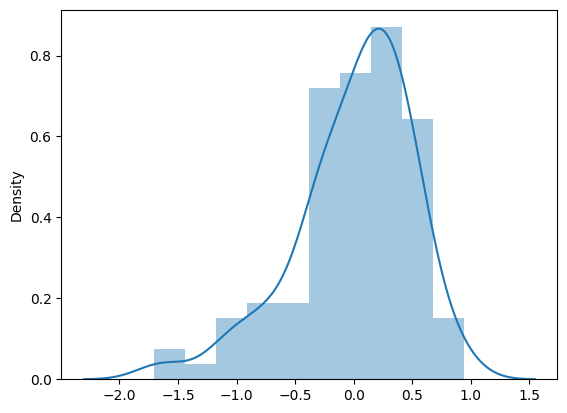

In [ ]:
X_test = test_data_std[['TOEFL Score','University Rating', 'SOP', 'LOR', 'Research']]
y_test = test_data_std['Chance of Admit']
X_test = sm.add_constant(X_test) # adding bias parameter
y_predict = results.predict(X_test)
residual = y_test - y_predict
sns.distplot(residual)

In [ ]:
abs(residual.mean())

1.0480505352461477e-15

- The model's means residuals are 0.0074, which indicates it is a good estimator.

Text(0, 0.5, 'y_predict')

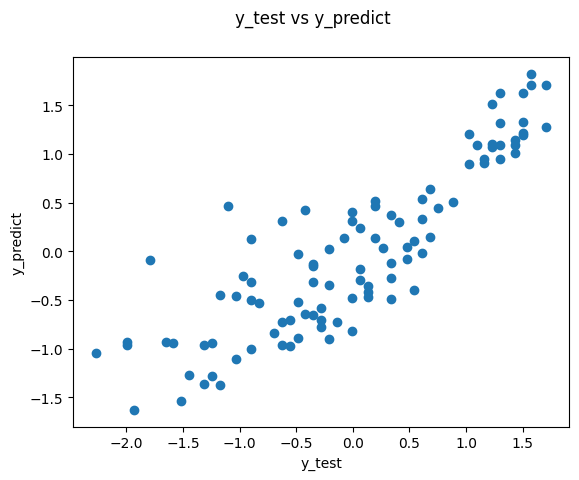

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict)
fig.suptitle('y_test vs y_predict')              # Plot heading
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_predict')

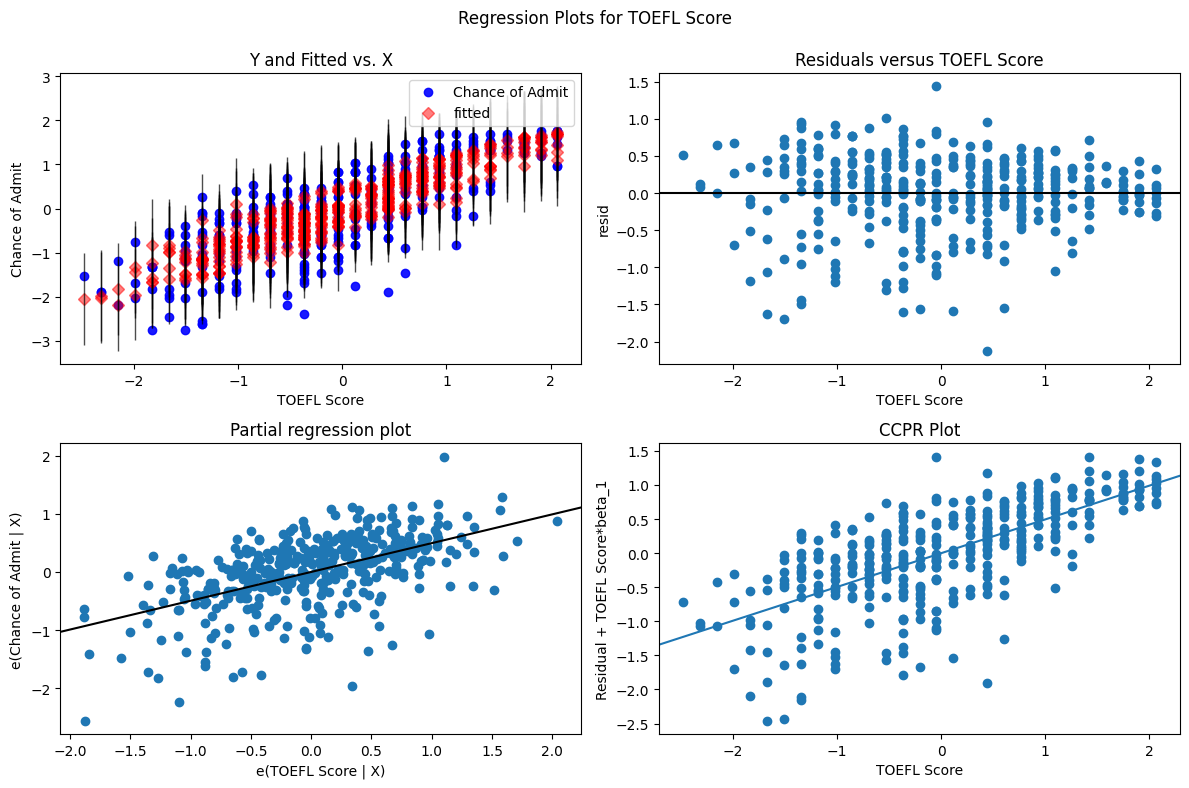

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results, 'TOEFL Score', fig=fig)

#### Inferences
- We can see that the points are plotted randomly spread or scattered.
- points or residuals are scattered around the ‘0’ line, there is no pattern, and points are not based on one side so there’s no problem of heteroscedasticity.
- With the predictor variable ‘area’ there’s no heteroscedasticity.

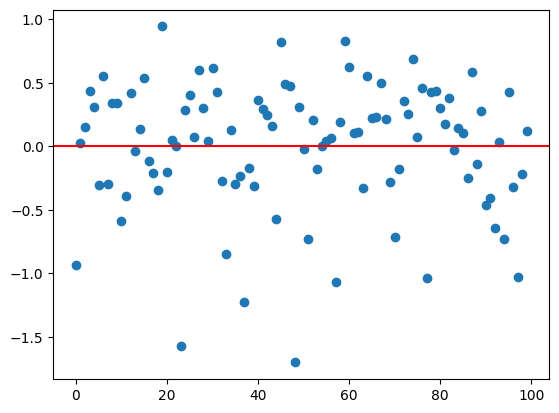

In [ ]:
plt.scatter(np.arange(residual.shape[0]),residual)
plt.axhline(residual.mean(),color = 'r')

#### Inference
- Residuals are evenly spread

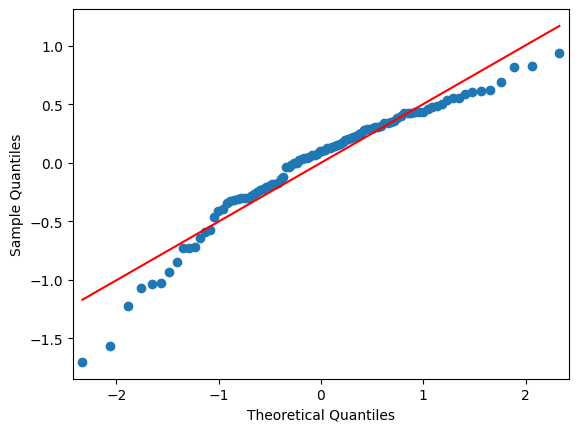

In [ ]:
sm.qqplot(residual, line = 's')
plt.show()

#### Inferences
- Data that aligns closely to the dotted line indicates a normal distribution.

## Model Performance Evaluation
- Metrics checked
- MAE
- RMSE
- R2
- Adj R2
- Train and Test performances are checked

In [ ]:
r2 = r2_score(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error( y_test, y_predict )
rmse = np.sqrt( mean_squared_error( y_test, y_predict ))
mape = mean_absolute_percentage_error(y_test,y_predict)

# initialise data of lists.
perf_data = [[r2],[mae],[mse],[rmse],[mape]]
# Creates pandas DataFrame.
eval_ = pd.DataFrame(perf_data,columns= ["Scores"] ,index = ["R-Squared","Mean Absolute Error","Mean Square Error",
                                                             "Root Mean Square Error","Mean Absolute Percentage Error"])
eval_.head()

,Scores
R-Squared,0.747812
Mean Absolute Error,0.387956
Mean Square Error,0.252188
Root Mean Square Error,0.502184
Mean Absolute Percentage Error,4.095158


#### Inference
- Error term
An error term appears in a statistical model, like a regression model, to indicate the uncertainty in the model.

1. R-Squared  - 0.72
- This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.As seen above our residual plot looks good, which means we donot have any bias in our model.
R-squared does not indicate if a regression model provides an adequate fit to your data. A good model can have a low R2 value. On the other hand, a biased model can have a high R2 value
2. Mean Absolute Error - 0.40
- MAE describes the typical magnitude of the residuals. Small MAE suggests the model is great at prediction, while a large MAE suggests that your model may have trouble in certain areas. There is scope of improvement.

3. Mean Square Error - 0.28
- MSE equation is most apparent with the presence of outliers in our data.
While each residual in MAE contributes proportionally to the total error, the error grows quadratically in MSE.This means that outliers in our data will contribute to much higher total error in the MSE than they would the MAE.
4. Root Mean Square Error - 0.53
- RMSE is defined as the square root of the average squared difference between the predicted and the actual score. The lower the RMSE, the better a model fits a dataset
A huge difference between the RMSE and MAE indicates outliers. A smaller difference indicates less outliers in our case.
5. Mean Absolute Percentage Error - 3.1%
- MAPE is biased towards predictions that are systematically less than the actual values themselves.MAPE will be lower when the prediction is lower than the actual compared to a prediction that is higher by the same amount

# Summary
## EDA analysis
- The variables GRE score, TOFEL Score, CGPA, Chance of Admit are Continious numerical variables
-  University Rating, SOP, LOR are Ordinal variables
- Research is a boolean variable having values 1 or 0
- There are no duplicate rows in the data
- There are no missing data values
- Among categorical variables data is not uniformly distributed among all values.
- Skewness of the data is small and data is roughly bell shaped
- Since negligible amounts of outliers are found we didn't delete this because it will help in generalizing the model
- The VIF values of GRE score, TOEFL Score, CGPA are very high indicating multicoliniarity. Since TOEFL score has the least VIF score among the related variables we keep this as the independent variable. This helps in avoiding multicoliniarity among independent variables

## Model analysis

- The equation of best fitted line is described as
$
Chance of Admit = (0.4925 * TOEFL Score ) + (0.1332 * University Rating) + (0.1015 * SOP) + (0.1563 *  LOR) + (0.1520 * Research)
$

## Possible Model Improvement Areas
- We have a couple of options:

1. Add new features GRE_TOEFL_CGPA_Ratio = (GRE & TOEFL Score & CGPA ratio) etc.
2. Removing outliers or handling outlier by minmax distribution.
3. Build a non-linear model

## Suggestions

Graduation Admission:
- Model suggests that the TOEFL score has the highest influence on getting admissions
Hence students should focus on getting good TOEFL scores.
- Other variables(SOP, LOR, Research) also have significant influence
